### Connection of random walk and diffussion 

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def Randomwalk1D(n):
    x = np.arange(n)
    y = [0]

    for i in range(len(x)-1):
       step = np.random.uniform(0,1)

       if step < 0.5: # if step is less than 0.5 we move up    
           y.append(y[-1] + 1)
       if step > 0.5: # if step is greater than 0.5 we move down  
           y.append(y[-1] - 1)


    return [x,np.array(y)]



#2d
def randomwalk_2d(n):
    
    x = np.zeros(n)
    y = np.zeros(n) 
    direction=["UP","DOWN","RIGHT","LEFT"]
    for i in range(1, n): 
        step = np.random.choice(direction) 
        if step == "RIGHT": 
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
        elif step == "LEFT": 
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
        elif step == "UP": 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
        else: 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1

    return [x,y]



def hist_3d(dat):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(dat[:,0],
                                          dat[:,1])
    
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    
    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.title('3d Distribution')
    plt.show()

#### 1D Random Walk and the distribution of the final points

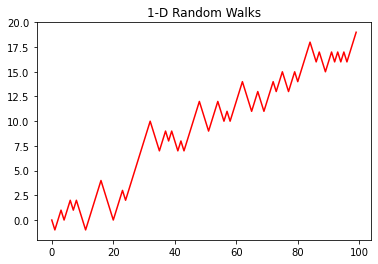

In [20]:
Randwalk = Randomwalk1D(100) 
plt.plot(Randwalk[0],Randwalk[1],'r-', label = "Randwalk1D") 
plt.title("1-D Random Walks")
plt.show()

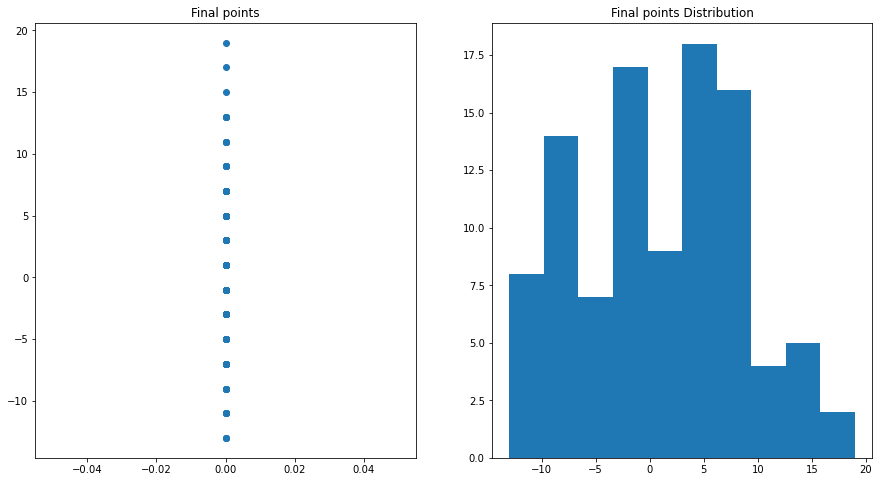

In [21]:
fin_points = np.zeros(100)
for i in range(100):
    Randwalk = Randomwalk1D(50)
    fin_points[i] = Randwalk[1][-1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.scatter(np.zeros(len(fin_points)), fin_points )
ax1.set_title("Final points")
ax2.hist(fin_points)
ax2.set_title("Final points Distribution")  
plt.show()

#### 2D Random Walk and the distribution of the final points

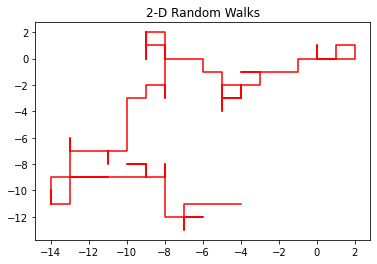

In [22]:
rw = randomwalk_2d(100) 
plt.plot(rw[0],rw[1],'r-', label = "Randwalk2D") 
plt.title("2-D Random Walks")
plt.show()

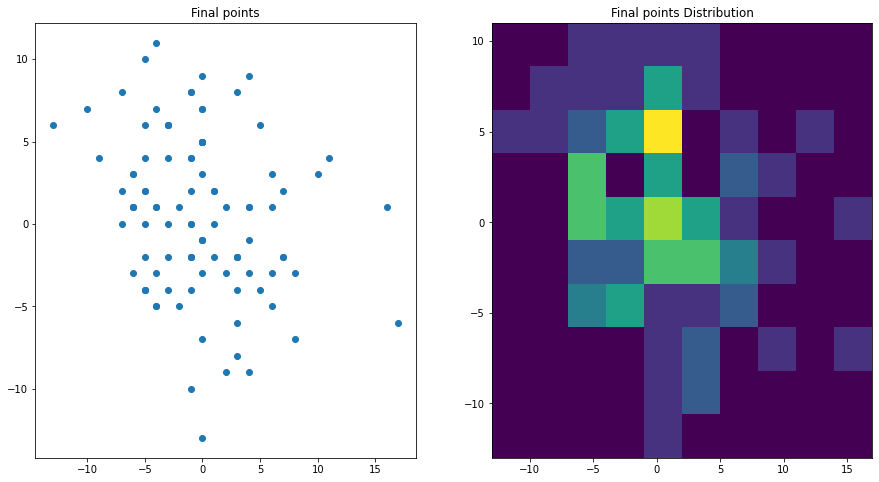

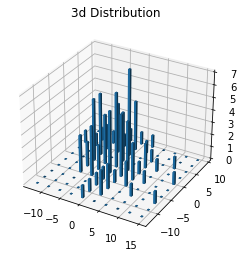

In [23]:
fin_points = np.zeros((100,2))
for i in range(100):
    rw = randomwalk_2d(50)
    fin_points[i,0] = rw[0][-1]
    fin_points[i,1] = rw[1][-1]


# make figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.scatter(fin_points[:,0], fin_points[:,1])
ax1.set_title("Final points")
ax2.hist2d(fin_points[:,0], fin_points[:,1])
ax2.set_title("Final points Distribution")
plt.show()
    
hist_3d(fin_points)
